# Olist E-commerce: A Data-Driven Diagnosis for Growth

### Project: Olist E-commerce Data Analysis
### Author: Lucas Ker
### Date: October 31, 2025

---

## Summary

This report presents the key findings from a comprehensive analysis of the Olist e-commerce dataset, tracking the full customer journey from purchase to review. Our investigation revealed that while the company is a powerful engine for **customer acquisition**, its sustainable growth is critically undermined by two core challenges: **inaccurate logistics estimates** and a near-total **lack of customer retention.**

Our analysis proved that customer dissatisfaction is not driven by delivery speed, but by **broken delivery promises**. Furthermore, our RFM and K-Means segmentation revealed that **97.5% of all customers buy only once**, making the business highly dependent on a "leaky bucket" acquisition model.

Finally, while our analysis determined that daily sales forecasting is statistically **unreliable** for this dataset, we successfully built a predictive classification model. This model can **proactively identify 68% of all high-risk (1 or 2-star) reviews** before they happen, enabling a shift from reactive to proactive customer service. The final recommendations provide a data-driven blueprint to fix logistics, foster the crucial second purchase, and leverage machine learning to mitigate bad customer experiences.

---

### Table of Contents

1.  **[Introduction](#introduction)**
2.  **[Finding #1: The Critical Impact of the Delivery Promise](#finding1)**
3.  **[Finding #2: A Strategic Map of the Product Portfolio](#finding2)**
4.  **[Finding #3: The 97.5% Single-Purchase Problem](#finding3)**
5.  **[Finding #4: The Power of Predictive Modeling](#finding4)**
6.  **[Strategic Recommendations & Conclusion](#conclusion)**

---

## Introduction <a id="introduction"></a>

This project analyzed end-to-end data from the Olist ecosystem, from the initial order to the final customer review. The objective was to move beyond surface-level metrics to identify the key drivers of success and the friction points that impact the customer experience and, consequently, business growth. The following sections detail the three most impactful insights uncovered during the analysis.

In [1]:
# --- Setup ---
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg # Library to display images
from pathlib import Path
import sys
sys.path.append('..')

from src.viz import display_image_grid

# Path to the figures directory
figures_path = Path('../outputs/figures')

# Function to display a saved image
def display_image(file_name, title=""):
    """Displays an image from the figures directory."""
    try:
        img_path = figures_path / file_name
        img = mpimg.imread(img_path)
        
        plt.figure(figsize=(18, 9))
        plt.imshow(img)
        plt.axis('off') # Hide axes
        plt.title(title, fontsize=12, pad=20)
        plt.show()
    except FileNotFoundError:
        print(f"Error: The file '{file_name}' was not found in '{figures_path}'.")

print("Setup complete.")

Setup complete.


---
## Finding #1: The Critical Impact of the Delivery Promise <a id="finding1"></a>

Statistical analysis revealed that the most significant factor driving customer dissatisfaction is not the total waiting time, but the **breach of the delivery promise**. Orders that arrive after the estimated delivery date have a drastically higher probability of receiving 1-star reviews, regardless of the total transit time. Customers forgive a long but predictable wait, but they do not forgive an unexpected delay. This indicates that the accuracy of delivery estimates and on-time fulfillment are more crucial for satisfaction than absolute speed.

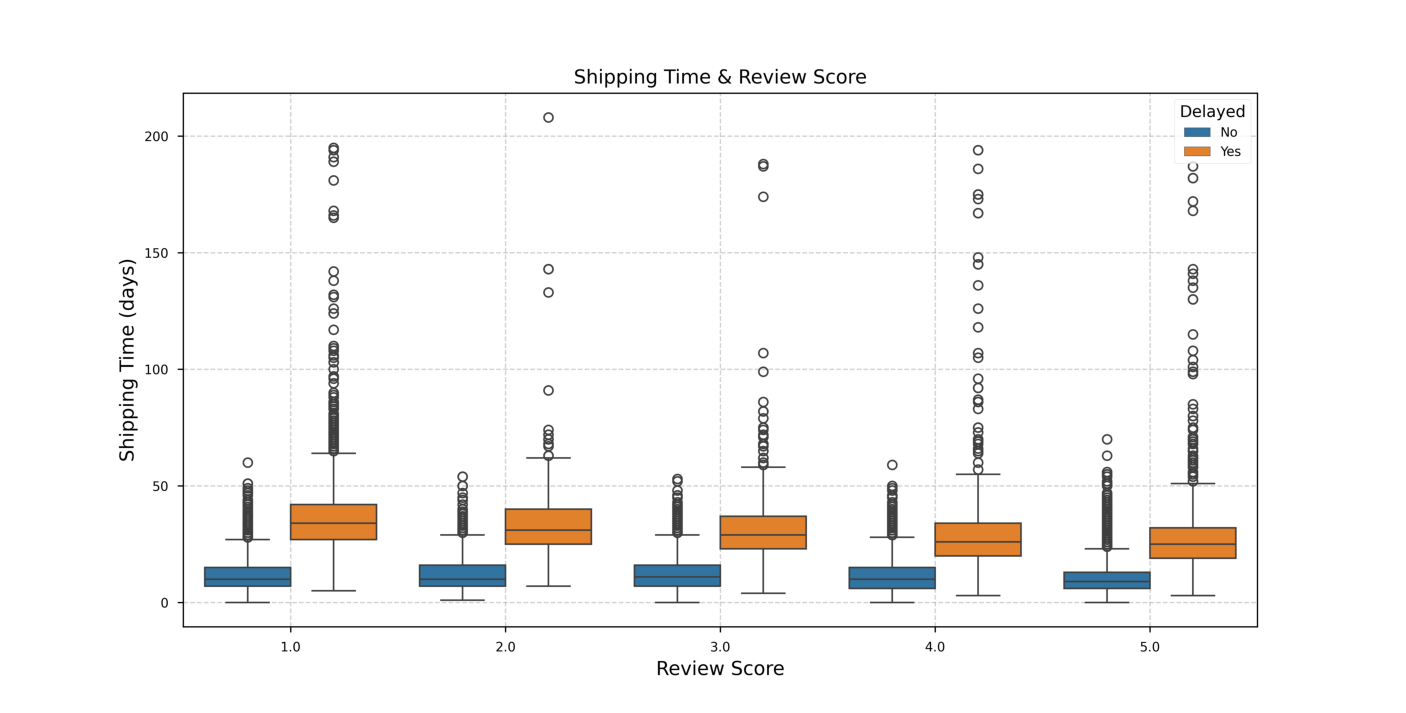

In [2]:
display_image('box_shipping_time_by_review_score.png')

---
## Finding #2: A Strategic Map of the Product Portfolio <a id="finding2"></a>

The performance across product categories is heterogeneous, revealing a clear map of opportunities and challenges. While categories like `health_beauty` and `watches_gifts` are "Star" performers (high revenue and high satisfaction), the highest-volume products, such as `bed_bath_table` and `furniture_decor`, generate significant revenue but suffer from mediocre reviews. These "problematic cash cows" represent a risk to the brand's reputation and a critical opportunity for improving the product or delivery experience.

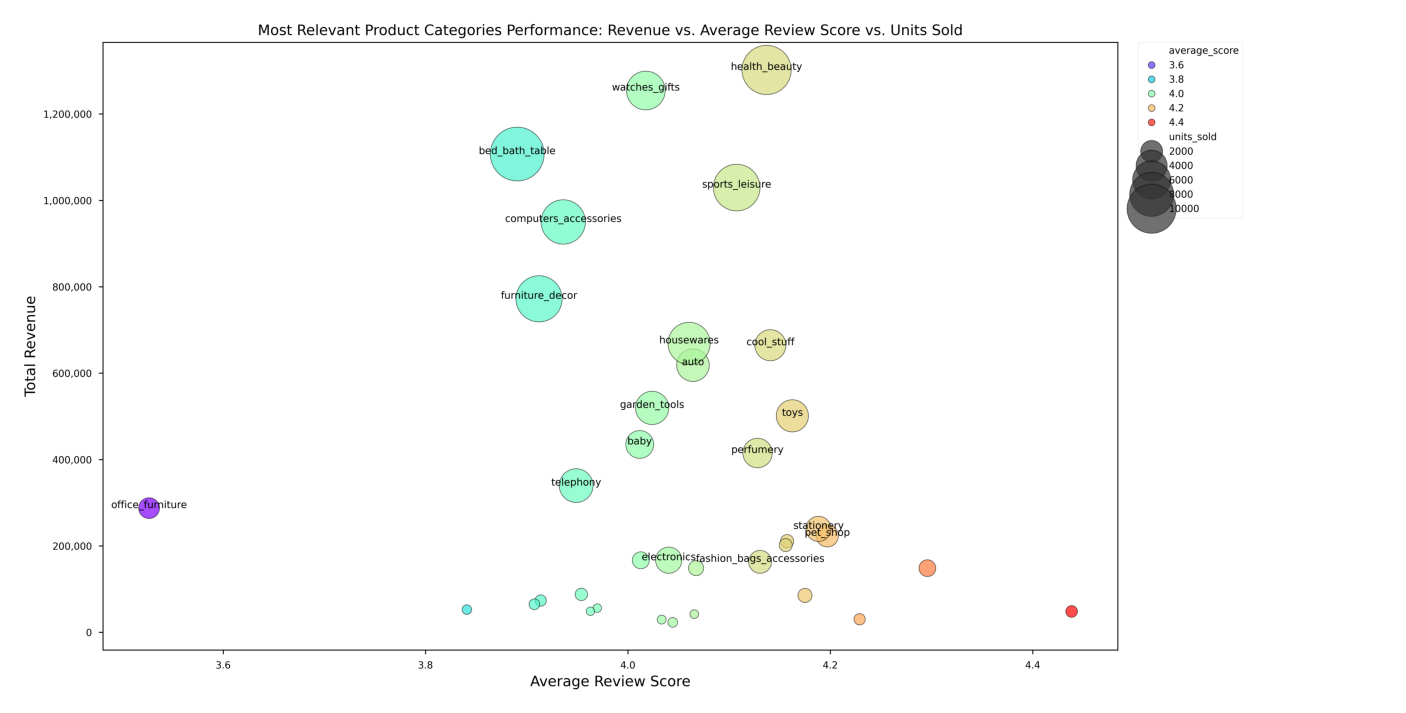

In [3]:
display_image('category_performance_bubble_plot.png')

---
## Finding #3: The 97.5% Single-Purchase Problem <a id="finding3"></a>

A deep dive into customer purchasing behavior revealed the single greatest challenge and opportunity for Olist: the business model is almost entirely dependent on acquiring new customers who never make a second purchase.

Our RFM (Recency, Frequency, Monetary) analysis, validated by K-Means Clustering, exposed a stark split in the customer base:

- 97.5% of All Customers are Single-Purchase Clients: The vast majority of the base (92,507 customers) has a purchase Frequency of just 1. The business has a "leaky bucket" problem: customers are acquired but not retained.

- 2.5% form a "Loyal Elite": A tiny segment of 2,931 customers is responsible for all repeat business. This group (identified as Group C: Loyals by our K-Means model) is disproportionately valuable, with a median monetary value more than double that of single-purchase clients.

Our manual segmentation, after correcting for a critical flaw in the Frequency score, defined the two key battlegrounds for the 97.5% of single-purchase clients:

- Need Attention (56,012 customers): The largest single segment. These are recent one-time buyers. They represent the biggest risk and opportunity—they must be converted to a second purchase before they lapse.

- Hibernating/Lost (37,083 customers): The second-largest segment. These are old one-time buyers who are effectively lost.

This analysis proves Olist is not a "retention" business; it is an "acquisition and first-purchase" business. The most critical strategic lever for growth is **fostering the second purchase**.

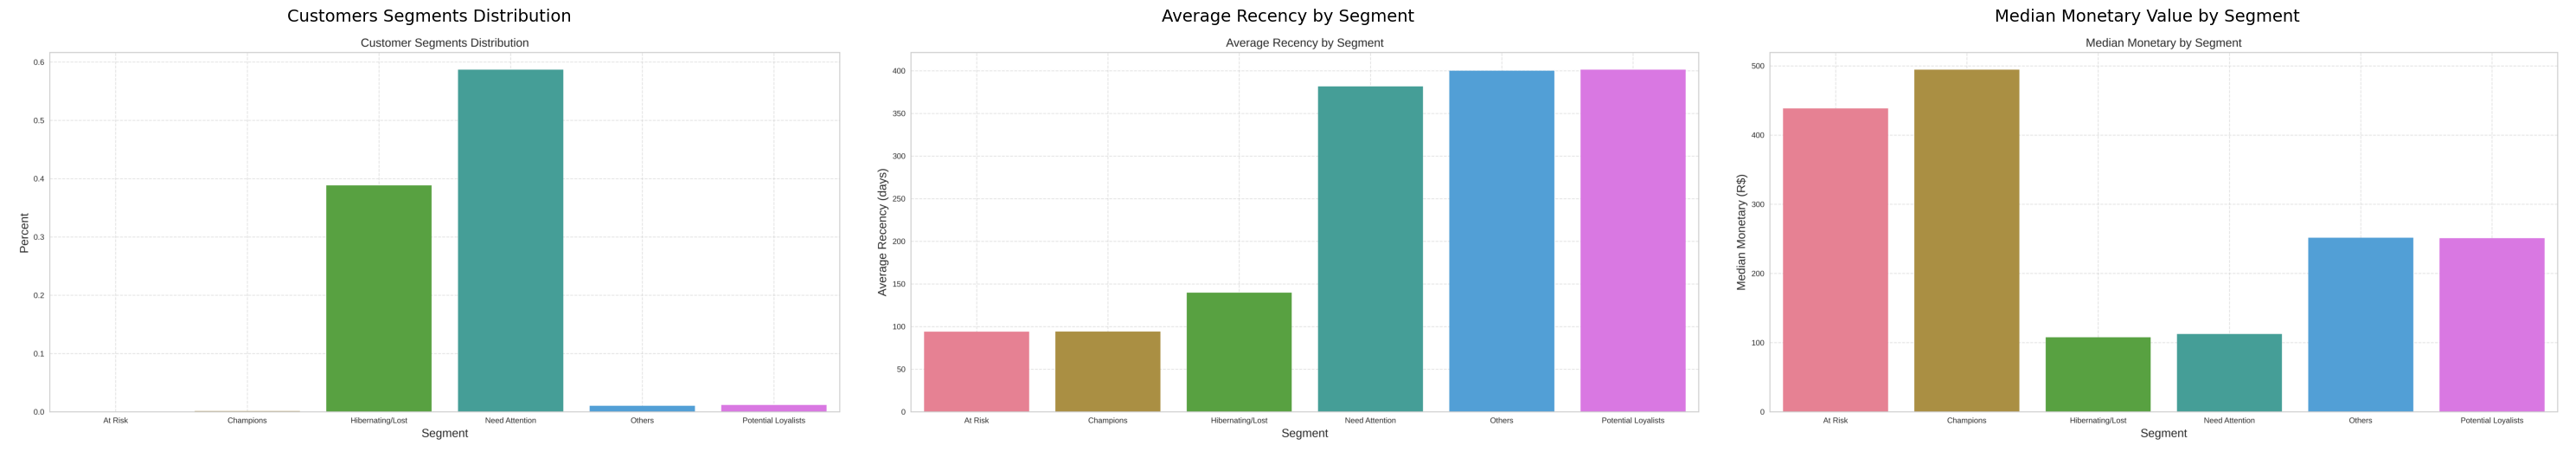

In [4]:
rfm_chart_files = [
    'customer_segments_distribution.png',
    'average_recency_by_segment.png',
    'median_monetary_by_segment.png'
]

rfm_chart_titles = [
    'Customers Segments Distribution',
    'Average Recency by Segment',
    'Median Monetary Value by Segment'
]

display_image_grid(
    file_names=rfm_chart_files,
    figures_path=figures_path,  
    titles=rfm_chart_titles,
    cols=3,
    figure_size=(30, 30)
)


--- 

## Finding #4: The Power of Predictive Modeling <a id="finding4"></a>

To look forward, we built two machine learning models: one to forecast future sales (a time-series model) and one to predict customer dissatisfaction (a classification model).

- **4.1. Daily Sales Forecasting is Unreliable**

    Our first attempt was to forecast daily sales using the Prophet library. **The key finding is that a daily forecast for this business is statistically unreliable and should not be used for operational decisions.**

    This conclusion is based on two facts:

    - Insufficient Data: With less than two years of data, the model had too few cycles to learn complex annual patterns (like Black Friday) from random noise.

    - Failed Baseline Test: The complex Prophet model (MAE: 24.37%) performed no better than a simple "Naive" baseline (MAE: 25.56%) that predicted sales would be the same as 7 days prior.


- **4.2. We Can Proactively Identify 68% of Bad Reviews**

    Our second model was a major success. We built a **Random Forest classifier** to predict which orders were at high risk of receiving a 1 or 2-star review, based on features like shipping_delay_days, price, freight_value, and product_category. The final model allows the business to move from a *reactive* ("Sorry you had a bad time") to a *proactive* ("We see your order is late, here is a voucher") customer service model.

---
## Strategic Recommendations & Conclusion <a id="conclusion"></a>

Based on the complete data analysis, from EDA to predictive modeling, we recommend four key strategic actions to drive sustainable growth.

1. **Fix the Core Problem: Overhaul Delivery Estimates** Our EDA proved that customer dissatisfaction is not driven by *long* delivery times, but by *broken promises*. The **#1 priority** must be to **fix the delivery estimation algorithm**. Use the data from notebook_02 to create more accurate, conservative estimates. Fulfilling the promise is more important than offering unrealistic speed.

2. **Launch a Two-Axis Retention Strategy** Our RFM analysis showed the business is split 97.5% / 2.5%. The retention strategy must reflect this: 

- For the 97.5% (Mass Market): Focus all marketing for the Need Attention segment on one goal: driving the second purchase. Use incentives and follow-ups to convert these recent, single-purchase customers.

- For the 2.5% ("Loyal Elite"): Protect this tiny, high-value group (Group C) at all costs with a true VIP/loyalty program.

3. **Operationalize the "Bad Review" Prediction Model**: Implement the Random Forest model from notebook_04 into the live production system. When an order is flagged (a1 is predicted), automatically trigger a customer service workflow (e.g., a support ticket, a proactive email with a discount voucher) to intercept the negative experience *before* the customer leaves the review. This system can proactively save 68% of at-risk customers.

4. **Shift Strategic Planning to Monthly Forecasts** **Do not use a daily sales forecast for operations.** Our analysis in notebook_04 proved it is unreliable. All strategic planning for inventory, cash flow, and marketing spend should be based on a more stable and reliable **Monthly Sales Forecast**.

#### **Final Conclusion:**

Olist has successfully built a powerful customer acquisition engine. However, the data shows that this growth is not sustainable without addressing the core challenges of post-purchase logistics and non-existent customer retention. The next era of growth will not come from acquiring *more* customers, but from **building a business that can fulfill its promises and earn a second purchase.**